<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya (2348556) 🎃

Importing Dependencies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")

In [38]:
# pip install ucimlrepo

Importing dataset

In [39]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [40]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [41]:
y.head()

,Revenue
0,False
1,False
2,False
3,False
4,False


In [42]:
X.shape

(12330, 17)

In [43]:
X.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

So we see that there are no missing values.

Partitioning (K-Means) Clustering on 'ProductRelated_Duration' and 'ExitRates' features

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X[['ProductRelated_Duration','ExitRates']])
X['cluster_number'] = kmeans.labels_
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,cluster_number
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


Visualization of KMeans Clustering

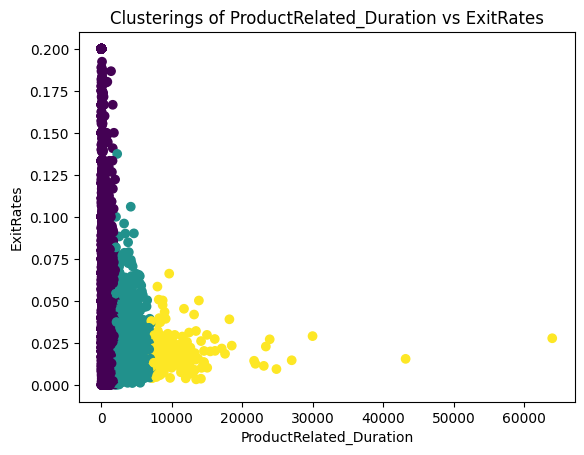

In [45]:
plt.scatter(x=X['ProductRelated_Duration'],y=X['ExitRates'],c=X['cluster_number']) #The c parameter in plt.scatter is used to specify the color of each point based on the cluster to which it belongs.
plt.xlabel("ProductRelated_Duration")
plt.ylabel("ExitRates")
plt.title("Clusterings of ProductRelated_Duration vs ExitRates")
plt.show()

Finding optimal number of clusters using Elbow Method

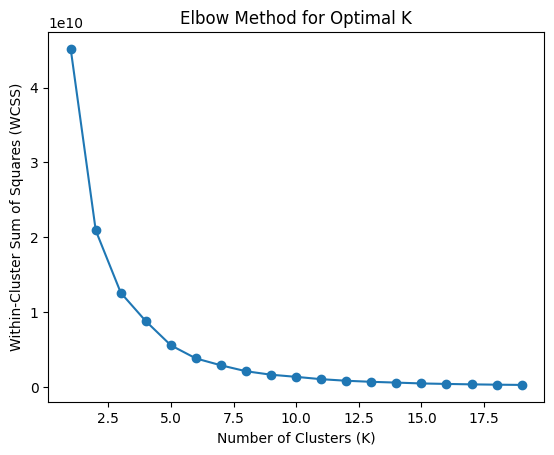

In [46]:
from sklearn.datasets import make_blobs

k_values = range(1, 20)

# List to store the within-cluster sum of squares (WCSS) for each K
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X[['ProductRelated_Duration','BounceRates']])
    wcss.append(kmeans.inertia_)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

Partitioning (K-Means) Clustering on 'ProductRelated_Duration' and 'BounceRates' features

In [47]:
from sklearn.cluster import KMeans
# Incorporating optimal number of cluster value
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(X[['ProductRelated_Duration','BounceRates']])
labels = kmeans.labels_
X['cluster_number'] = labels
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,cluster_number
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


Visualization of KMeans Clustering

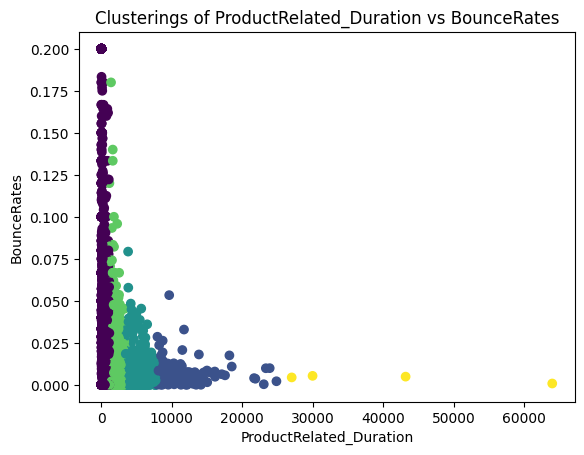

In [48]:
plt.scatter(x=X['ProductRelated_Duration'],y=X['BounceRates'],c=X['cluster_number'])
plt.xlabel("ProductRelated_Duration")
plt.ylabel("BounceRates")
plt.title("Clusterings of ProductRelated_Duration vs BounceRates")
plt.show()

Quality of clusters by K-Means, measuring by silhouette score.

In [49]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X[['ProductRelated_Duration','BounceRates']], labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6545854679285005


BIRCH Implementation (Hierarchical)

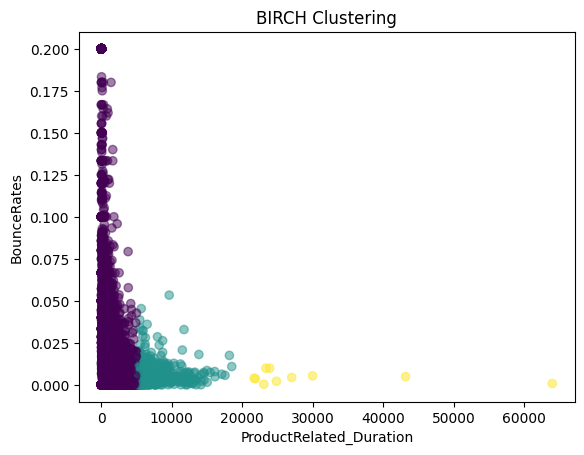

In [50]:
from sklearn.cluster import Birch

# Specify the number of clusters (n_clusters)
n_clusters = 5

# Initialize BIRCH model
birch = Birch()
# birch = Birch(n_clusters=n_clusters). optional.

# Fit the model to the data
birch.fit(X[['ProductRelated_Duration', 'BounceRates']])

# Get cluster assignments
labels = birch.labels_

# Plot the clusters using the specific column names
plt.scatter(X['ProductRelated_Duration'], X['BounceRates'], c=labels, cmap='viridis', alpha=0.5)
plt.title('BIRCH Clustering')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.show()

Quality of clusters by BIRCH, measured using silhouette score.

In [51]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X[['ProductRelated_Duration','BounceRates']], labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8150362970670775


Agglomerative Clustering implementation (Hierarchical)

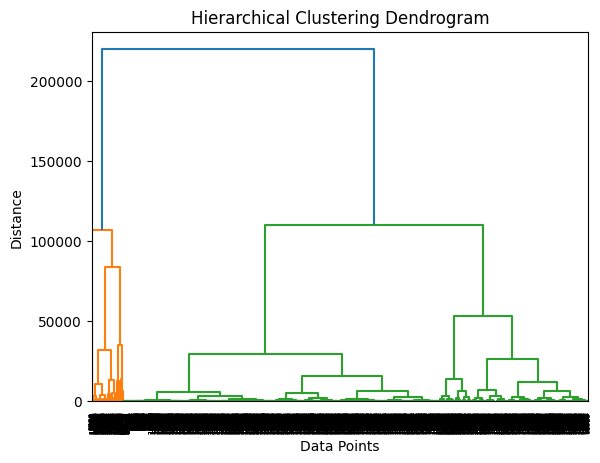

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(X[['ProductRelated_Duration','BounceRates']], method='ward')  # 'ward' linkage minimizes the variance of clusters being merged
# Plotting the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [53]:
from scipy.cluster.hierarchy import fcluster
# Set a threshold to cut the dendrogram and obtain clusters
threshold = 1.5
# If the distance between two clusters in the dendrogram is greater than the threshold, they are considered separate clusters.
# If the distance is less than or equal to the threshold, the clusters are merged.
clusters = fcluster(linkage_matrix, threshold, criterion='distance')
# Print cluster assignments for each data point
print("Cluster Assignments:", clusters)
# Each integer represents a cluster, and data points with the same integer are assigned to the same cluster.

Cluster Assignments: [ 618  784  618 ...  684 1190  641]


Quality of cluster for Agglomerative Hierarchical Clustering.

In [54]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X[['ProductRelated_Duration','BounceRates']], clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6119550795355923


**Inference**

The Silhouette Score analysis reveals that the BIRCH algorithm excelled in clustering, particularly when configured with $3$ clusters. K-Means, with $5$ clusters, also demonstrated satisfactory performance. On the other hand, Agglomerative clustering, which aimed to minimize within-cluster variance, exhibited the least favorable Silhouette Score, slightly exceeding $0.6$. It's important to understand that a higher Silhouette Coefficient signifies well-defined and more distinct clusters.

Now, let's break down the concepts and interpretations:

Silhouette Score:

The Silhouette Score is a metric used to evaluate the performance of clustering algorithms. It measures how well-defined and separated the clusters are in a dataset. The score ranges from $-1$ to $1$, where a higher value indicates better-defined clusters.

BIRCH stands for Balanced Iterative Reducing and Clustering using Hierarchies. It is a clustering algorithm designed for large datasets. The statement suggests that BIRCH, with three clusters, achieved the highest Silhouette Score, implying superior clustering performance.

K-Means is a popular clustering algorithm that partitions data into K clusters based on similarity. In this context, K-Means with five clusters performed reasonably well, though not as strongly as BIRCH with three clusters.

Agglomerative clustering is a hierarchical clustering technique that starts with individual data points and progressively merges them into larger clusters. The statement notes that when using Agglomerative clustering to minimize within-cluster variance, it produced the lowest Silhouette Score, just above $0.6$.
Interpretation of Silhouette Score:

A Silhouette Score slightly above $0.6$ for Agglomerative clustering implies that the clusters formed by this algorithm are not as well-defined or separated compared to the other algorithms. A higher Silhouette Score is generally desired for effective clustering.

The Silhouette Coefficient is the specific measure being used to calculate the Silhouette Score. It considers both the average distance between a data point and other points in the same cluster $(a)$ and the average distance to points in the nearest neighboring cluster $(b)$. The formula is given by $(b - a) / max(a, b)$.